In [3]:
import pandas as pd
import requests
import matplotlib.pyplot as plt #To provide data visualization

# Import BeautifulSoup
from bs4 import BeautifulSoup
import requests

#Organize text
from collections import defaultdict

In [4]:
# Use '!' only if you are installing directly from your notebook. 
# '!' sign tells Jupyter Notebook to interpret the following code as bash code (what you use in your terminal)
!pip install beautifulsoup4 -q

In [5]:
# Use '!' only if you are installing directly from your notebook. 
# '!' sign tells Jupyter Notebook to interpret the following code as bash courlde (what you use in your terminal)
!pip install lxml -q
!pip install html5lib -q

# LA CENTRALE - CARS

In [41]:
LaCentrale_https = 'https://www.lacentrale.fr'

In [42]:
brands = ['renault','peugeot','citroen','toyota','volkswagen']

In [43]:
#Scraping settings
page_to_scrap = 150
nbr_car = 16

In [47]:
link_car = []
list_brand = []
list_model = []
list_price = []
list_year = []
list_km = []
list_transition = []
list_energie = []
list_longitude = []
list_latitude = []
list_zipcode = []


count=0
for p in range(page_to_scrap):
    
    
  
    for i in range(len(brands)):
        r_LaCentrale = requests.get('https://www.lacentrale.fr/occasion-voiture-marque-{}-{}.html'.format(brands[i],p),headers = {'User-Agent': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'})
        soup_page = BeautifulSoup(r_LaCentrale.content)
        
        
        
        for e in range(nbr_car):

            try:

                link = soup_page.select('div.searchCard')[e].find_all('a')[0].get('href')
                car_link = LaCentrale_https+link

                response_car = requests.get(car_link, headers = {'User-Agent': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'})
                sc = BeautifulSoup(response_car.content)


                brand = sc.find_all('div',"cbm-tab__content")[1].find_all('input')[1].get('value')

                model = sc.find_all('div',"cbm-tab__content")[1].find_all('input')[2].get('value')

                price = sc.find_all('div',"cbm-tab__content")[1].find_all('input')[3].get('value')




                car_description = defaultdict()

                soup_car_description = sc.select("div.cbm-moduleInfos__informationList.cbm-moduleInfos__information_column_break ul li")

                for elt in soup_car_description:
                    feature = elt.get_text().split(':')
                    car_description[feature[0].strip()] = feature[1].strip()

                year = car_description['Année']

                km = car_description['Kilométrage compteur?']
                km = km.replace('Km','').replace(' ','').strip()

                trans = car_description['Boîte de vitesse']

                energie = car_description['Énergie']


                #location
                soup_latlon = sc.select('div.cbm-mainInfos script')[9]


                
                #location (ZipCode)
                soup_popin_car = sc.select('div script')[1]
                for elt in soup_popin_car:
            
                    feature = elt.split(',')
                    zipcode = feature[26].split(':')[1].replace('"','').replace('}','')
                
                  
                #location (Lat, Lon)
                for elt in soup_latlon:
                    feature = elt.split(',')
                    longitude = feature[24].split(':')[2].replace('"','')
                    latitude = feature[25].split(':')[1].replace('"','').replace('}','')


                
                
                count +=1
                print('N°{} - Scraping brand : {} for Page {} '.format(count,brands[i],p+1))
                
                

            except:
                continue



            link_car.append(car_link)
            list_brand.append(brand)
            list_model.append(model)
            list_price.append(price)
            list_year.append(year)
            list_km.append(km)
            list_transition.append(trans)
            list_energie.append(energie)
            list_longitude.append(longitude)
            list_latitude.append(latitude)
            list_zipcode.append(zipcode)



N°1 - Scraping brand : renault for Page 1 
N°2 - Scraping brand : renault for Page 1 
N°3 - Scraping brand : renault for Page 1 
N°4 - Scraping brand : renault for Page 1 
N°5 - Scraping brand : renault for Page 1 
N°6 - Scraping brand : renault for Page 1 
N°7 - Scraping brand : renault for Page 1 
N°8 - Scraping brand : renault for Page 1 
N°9 - Scraping brand : renault for Page 1 
N°10 - Scraping brand : renault for Page 1 
N°11 - Scraping brand : renault for Page 1 
N°12 - Scraping brand : renault for Page 1 
N°13 - Scraping brand : renault for Page 1 
N°14 - Scraping brand : renault for Page 1 
N°15 - Scraping brand : renault for Page 1 
N°16 - Scraping brand : renault for Page 1 
N°17 - Scraping brand : peugeot for Page 1 
N°18 - Scraping brand : peugeot for Page 1 
N°19 - Scraping brand : peugeot for Page 1 
N°20 - Scraping brand : peugeot for Page 1 
N°21 - Scraping brand : peugeot for Page 1 
N°22 - Scraping brand : peugeot for Page 1 
N°23 - Scraping brand : peugeot for Page 

In [48]:
list_car = {'Brand' : list_brand,
                 'Model': list_model,
                    'Gear' : list_transition,
                        'KM' : list_km,
                        'Energie' : list_energie,
                                 'Year' : list_year,
                                     'Price' : list_price,
                                        'Zip_code' : list_zipcode,
                                         'longitude' : list_longitude, 
                                             'latitude' : list_latitude,
                                                'link_car' : link_car,
                 
                }

#list_car

In [49]:
df_car = pd.DataFrame(list_car)
df_car

,Brand,Model,Gear,KM,Energie,Year,Price,Zip_code,longitude,latitude,link_car
0,RENAULT,CLIO,mécanique,7577,Diesel,2020,17830,33310,-0.5104989999999999,44.878583,https://www.lacentrale.fr/auto-occasion-annonc...
1,RENAULT,GRAND SCENIC,automatique,30201,Diesel,2020,23070,76120,1.0465014,49.4180309,https://www.lacentrale.fr/auto-occasion-annonc...
2,RENAULT,CLIO,mécanique,49851,Diesel,2019,11540,24400,0.3698788,45.0440403,https://www.lacentrale.fr/auto-occasion-annonc...
3,RENAULT,CLIO,mécanique,19318,Essence,2020,13360,24400,0.3698788,45.0440403,https://www.lacentrale.fr/auto-occasion-annonc...
4,RENAULT,KADJAR,mécanique,17010,Diesel,2021,27280,31120,1.3900007,43.51913769999999,https://www.lacentrale.fr/auto-occasion-annonc...
...,...,...,...,...,...,...,...,...,...,...,...
11526,VOLKSWAGEN,UP!,mécanique,126181,Essence,2013,7670,94110,2.327393,48.8097639,https://www.lacentrale.fr/auto-occasion-annonc...
11527,VOLKSWAGEN,POLO,mécanique,12,Essence,2022,22660,33310,-0.5121479,44.88030149999999,https://www.lacentrale.fr/auto-occasion-annonc...
11528,VOLKSWAGEN,T-ROC,automatique,4929,Essence,2021,33020,31670,1.5177695,43.54516710000001,https://www.lacentrale.fr/auto-occasion-annonc...
11529,VOLKSWAGEN,TIGUAN,automatique,23207,Diesel,2022,47180,31200,1.4208297,43.6587377,https://www.lacentrale.fr/auto-occasion-annonc...


# OBTAIN DATASET FROM LA CENTRALE SCRAPING

In [ ]:
df_car.to_csv('LaCentrale_car150.csv',encoding='utf-8-sig',index=False)

# ANALYSIS ON DATASET FROM LA CENTRALE SCRAPING

In [51]:
df_car.groupby('Brand')['Model'].count()

Brand
CITROEN       2344
PEUGEOT       2336
RENAULT       2346
TOYOTA        2247
VOLKSWAGEN    2258
Name: Model, dtype: int64

In [52]:
df_car.groupby('Brand')['Model'].nunique()

Brand
CITROEN       25
PEUGEOT       22
RENAULT       19
TOYOTA        25
VOLKSWAGEN    33
Name: Model, dtype: int64

In [76]:
df_car.groupby(['Brand','Model'])['KM'].nunique()

Brand       Model          
CITROEN     BERLINGO            81
            C-ELYSEE             1
            C-ZERO              11
            C1                 108
            C3                 580
                              ... 
VOLKSWAGEN  TIGUAN ALLSPACE     18
            TOUAREG             14
            TOURAN              51
            TRANSPORTER         15
            UP!                 49
Name: KM, Length: 124, dtype: int64

# LOAD DATASET FROM AUTOSPHERE & JOIN WITH LA CENTRALE

In [6]:
df_car = pd.read_csv('LaCentrale_car150.csv')
df_car.head()

,Brand,Model,Gear,KM,Energie,Year,Price,Zip_code,longitude,latitude,link_car
0,RENAULT,CLIO,mécanique,7577,Diesel,2020,17830,33310,-0.510499,44.878583,https://www.lacentrale.fr/auto-occasion-annonc...
1,RENAULT,GRAND SCENIC,automatique,30201,Diesel,2020,23070,76120,1.046501,49.418031,https://www.lacentrale.fr/auto-occasion-annonc...
2,RENAULT,CLIO,mécanique,49851,Diesel,2019,11540,24400,0.369879,45.044040,https://www.lacentrale.fr/auto-occasion-annonc...
3,RENAULT,CLIO,mécanique,19318,Essence,2020,13360,24400,0.369879,45.044040,https://www.lacentrale.fr/auto-occasion-annonc...
4,RENAULT,KADJAR,mécanique,17010,Diesel,2021,27280,31120,1.390001,43.519138,https://www.lacentrale.fr/auto-occasion-annonc...


# LOAD DATASET FROM AUTOSPHERE & JOIN WITH LA CENTRALE

In [7]:
scrap_autosphere = pd.read_csv('autosphere.csv')
scrap_autosphere.head()

,Unnamed: 0,Marque,Modele,Transmission,Kilometre,Energie,Annee,Prix,Code_postal,longitude,latitude
0,0,CITROEN,C4,Manuelle,28561,Essence,2018,14 890,60200,2.826100,49.4179
1,1,CITROEN,C4 cactus,Manuelle,14702,Essence,2020,15 999,86000,0.333300,46.5833
2,2,CITROEN,C4 picasso,Manuelle,88300,Diesel,2015,12 479,51100,4.033300,49.2500
3,3,CITROEN,C5 aircross,Automatique,1742,Diesel,2021,32 990,16430,0.145933,45.7167
4,4,CITROEN,C5 aircross,Automatique,50,Diesel,2020,30 880,38320,5.768200,45.1374


In [8]:
#Remove column 'Unnamed' from autosphere dataset
scrap_autosphere_2 = scrap_autosphere.drop(columns=['Unnamed: 0',],axis=1)
scrap_autosphere_2.head()

,Marque,Modele,Transmission,Kilometre,Energie,Annee,Prix,Code_postal,longitude,latitude
0,CITROEN,C4,Manuelle,28561,Essence,2018,14 890,60200,2.826100,49.4179
1,CITROEN,C4 cactus,Manuelle,14702,Essence,2020,15 999,86000,0.333300,46.5833
2,CITROEN,C4 picasso,Manuelle,88300,Diesel,2015,12 479,51100,4.033300,49.2500
3,CITROEN,C5 aircross,Automatique,1742,Diesel,2021,32 990,16430,0.145933,45.7167
4,CITROEN,C5 aircross,Automatique,50,Diesel,2020,30 880,38320,5.768200,45.1374


In [9]:
scrap_autosphere_2 = scrap_autosphere_2.rename(columns={"Marque": "Brand",
                                                         "Modele": "Model",
                                                         "Transmission": "Gear",
                                                            "Kilometre" : "KM",
                                                               "Annee" : "Year",
                                                                "Prix" : "Price",
                                                                    "Code_postal" : "Zip_code"
                                                                                                  })
                                                 
                                   
                                   

In [10]:
scrap_autosphere_2.to_csv('autosphere2.csv',encoding='utf-8-sig',index=False)

In [11]:
scrap_autosphere_2.head()

,Brand,Model,Gear,KM,Energie,Year,Price,Zip_code,longitude,latitude
0,CITROEN,C4,Manuelle,28561,Essence,2018,14 890,60200,2.826100,49.4179
1,CITROEN,C4 cactus,Manuelle,14702,Essence,2020,15 999,86000,0.333300,46.5833
2,CITROEN,C4 picasso,Manuelle,88300,Diesel,2015,12 479,51100,4.033300,49.2500
3,CITROEN,C5 aircross,Automatique,1742,Diesel,2021,32 990,16430,0.145933,45.7167
4,CITROEN,C5 aircross,Automatique,50,Diesel,2020,30 880,38320,5.768200,45.1374


In [12]:
df_car2 = df_car.drop(columns=['link_car'],axis=1)

In [13]:
df_car2.head()

,Brand,Model,Gear,KM,Energie,Year,Price,Zip_code,longitude,latitude
0,RENAULT,CLIO,mécanique,7577,Diesel,2020,17830,33310,-0.510499,44.878583
1,RENAULT,GRAND SCENIC,automatique,30201,Diesel,2020,23070,76120,1.046501,49.418031
2,RENAULT,CLIO,mécanique,49851,Diesel,2019,11540,24400,0.369879,45.044040
3,RENAULT,CLIO,mécanique,19318,Essence,2020,13360,24400,0.369879,45.044040
4,RENAULT,KADJAR,mécanique,17010,Diesel,2021,27280,31120,1.390001,43.519138


In [14]:
#Join the two dataset
frames = [df_car2,scrap_autosphere_2]

In [15]:
df_conso = pd.concat(frames,ignore_index=True)
df_conso

,Brand,Model,Gear,KM,Energie,Year,Price,Zip_code,longitude,latitude
0,RENAULT,CLIO,mécanique,7577,Diesel,2020,17830,33310,-0.510499,44.878583
1,RENAULT,GRAND SCENIC,automatique,30201,Diesel,2020,23070,76120,1.046501,49.418031
2,RENAULT,CLIO,mécanique,49851,Diesel,2019,11540,24400,0.369879,45.044040
3,RENAULT,CLIO,mécanique,19318,Essence,2020,13360,24400,0.369879,45.044040
4,RENAULT,KADJAR,mécanique,17010,Diesel,2021,27280,31120,1.390001,43.519138
...,...,...,...,...,...,...,...,...,...,...
18790,VOLKSWAGEN,Golf sw,Automatique,5000,Diesel,2021,28 999,79000,-0.481267,46.323100
18791,VOLKSWAGEN,T-roc,Automatique,55890,Essence,2018,25 900,13700,5.223900,43.416000
18792,VOLKSWAGEN,Golf sportsvan,Manuelle,106800,Diesel,2015,13 390,86000,0.333300,46.583300
18793,VOLKSWAGEN,Tiguan,Manuelle,61873,Diesel,2018,21 990,51100,4.033300,49.250000


In [16]:
df_conso.to_csv('LaCentrale+autosphere.csv',encoding='utf-8-sig',index=False)

# JOINING THE 2 DATASETS

In [17]:
dfa = pd.read_csv('LaCentrale+autosphere.csv')

In [18]:
dfa.describe(include='all')

,Brand,Model,Gear,KM,Energie,Year,Price,Zip_code,longitude,latitude
count,18795,18795,18773,18795.000000,18792,18795.000000,18795,18795.000000,18574.000000,18574.000000
unique,21,258,5,NaN,10,NaN,4419,NaN,NaN,NaN
top,PEUGEOT,208,mécanique,NaN,Diesel,NaN,11 990,NaN,NaN,NaN
freq,5121,1375,6480,NaN,8109,NaN,118,NaN,NaN,NaN
mean,NaN,NaN,NaN,36087.720883,NaN,2019.266879,NaN,51574.012663,2.500915,46.945962
std,NaN,NaN,NaN,39450.006178,NaN,2.238890,NaN,25311.716486,2.436448,2.210921
min,NaN,NaN,NaN,1.000000,NaN,1975.000000,NaN,1000.000000,-4.466963,42.564635
25%,NaN,NaN,NaN,7500.000000,NaN,2018.000000,NaN,33260.000000,0.666700,45.137400
50%,NaN,NaN,NaN,22459.000000,NaN,2020.000000,NaN,54510.000000,2.419483,47.249509
75%,NaN,NaN,NaN,53117.500000,NaN,2021.000000,NaN,73200.000000,4.751507,48.844800


# CLEANING & FILTERING OF THE DATASET

In [19]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18795 entries, 0 to 18794
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Brand      18795 non-null  object 
 1   Model      18795 non-null  object 
 2   Gear       18773 non-null  object 
 3   KM         18795 non-null  int64  
 4   Energie    18792 non-null  object 
 5   Year       18795 non-null  int64  
 6   Price      18795 non-null  object 
 7   Zip_code   18795 non-null  int64  
 8   longitude  18574 non-null  float64
 9   latitude   18574 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 1.4+ MB


In [20]:
print("Percentage of missing values:(%)")

print('--------------------------------')

display(100*dfa.isnull().sum()/dfa.shape[0])

Percentage of missing values:(%)
--------------------------------


Brand        0.000000
Model        0.000000
Gear         0.117052
KM           0.000000
Energie      0.015962
Year         0.000000
Price        0.000000
Zip_code     0.000000
longitude    1.175845
latitude     1.175845
dtype: float64

In [21]:
#remove the space from string type
dfa['Price'] = dfa['Price'].str.replace(" ","")

#Change column "Price" to float
dfa['Price'] = dfa['Price'].astype('float')

In [22]:
dfa.describe(include='all')

,Brand,Model,Gear,KM,Energie,Year,Price,Zip_code,longitude,latitude
count,18795,18795,18773,18795.000000,18792,18795.000000,18795.000000,18795.000000,18574.000000,18574.000000
unique,21,258,5,NaN,10,NaN,NaN,NaN,NaN,NaN
top,PEUGEOT,208,mécanique,NaN,Diesel,NaN,NaN,NaN,NaN,NaN
freq,5121,1375,6480,NaN,8109,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,36087.720883,NaN,2019.266879,21152.812769,51574.012663,2.500915,46.945962
std,NaN,NaN,NaN,39450.006178,NaN,2.238890,9495.119168,25311.716486,2.436448,2.210921
min,NaN,NaN,NaN,1.000000,NaN,1975.000000,2040.000000,1000.000000,-4.466963,42.564635
25%,NaN,NaN,NaN,7500.000000,NaN,2018.000000,13780.000000,33260.000000,0.666700,45.137400
50%,NaN,NaN,NaN,22459.000000,NaN,2020.000000,19220.000000,54510.000000,2.419483,47.249509
75%,NaN,NaN,NaN,53117.500000,NaN,2021.000000,26660.000000,73200.000000,4.751507,48.844800


In [23]:
print("Dataset cleaning:(%)")

print('--------------------------------')

print('We have removed {} rows from the initial dataset'.format(-(dfa.shape[0]-df_conso.shape[0])))
print('It represents the equivalent of {} % of the initial dataset'.format(round(-(dfa.shape[0]-df_conso.shape[0])/df_conso.shape[0])*100,4))

Dataset cleaning:(%)
--------------------------------
We have removed 0 rows from the initial dataset
It represents the equivalent of 0 % of the initial dataset


## BRAND CLEANING

In [24]:
dfa.groupby('Brand')['KM'].count()

Brand
AUDI             2
BMW              1
CHEVROLET        1
CITROEN       2579
DACIA            1
DS               1
FIAT             1
FORD             1
HYUNDAI          2
JEEP             1
KIA              1
MAZDA            1
NISSAN           1
OPEL            30
PEUGEOT       5121
RENAULT       4845
SKODA            1
SUZUKI           8
TOYOTA        2617
VOLKSWAGEN    3578
VOLVO            2
Name: KM, dtype: int64

In [25]:
#Filter per brand
mask2 = dfa['Brand'].isin(['RENAULT','PEUGEOT','CITROEN','TOYOTA','VOLKSWAGEN'])
dfa = dfa.loc[mask2,:]

In [26]:
dfa.groupby('Brand')['Model'].count()

Brand
CITROEN       2579
PEUGEOT       5121
RENAULT       4845
TOYOTA        2617
VOLKSWAGEN    3578
Name: Model, dtype: int64

In [27]:
100*dfa.Brand.value_counts()/dfa['Model'].count()

PEUGEOT       27.326574
RENAULT       25.853789
VOLKSWAGEN    19.092850
TOYOTA        13.964781
CITROEN       13.762006
Name: Brand, dtype: float64

In [28]:
print("Dataset cleaning:(%)")

print('--------------------------------')

print('We have removed {} rows from the initial dataset'.format(-(dfa.shape[0]-df_conso.shape[0])))
print('It represents the equivalent of {} % of the initial dataset'.format(round(-(dfa.shape[0]-df_conso.shape[0])/df_conso.shape[0],4)*100))

Dataset cleaning:(%)
--------------------------------
We have removed 55 rows from the initial dataset
It represents the equivalent of 0.29 % of the initial dataset


## MODEL CLEANING

In [29]:
# Transform the column Model with Uppercase
dfa['Model'] = dfa['Model'].str.upper()

# Transform the column Gear with Uppercase
dfa['Gear'] = dfa['Gear'].str.upper()


# Transform the column Energie with Uppercase
dfa['Energie'] = dfa['Energie'].str.upper()

#Correcting one specific model for Toyota
dfa['Model'] = dfa['Model'].str.replace("RAV 4","RAV4")

In [30]:
#Statistics on brand's models
model_brands = dfa.groupby('Brand')['Model'].nunique()
for i in range(len(model_brands)):
    print('The brand {} has {} models.'.format(model_brands.index[i],model_brands[i]))
print('--------------------------------------------------------------------------------')
print(' ')
print('We are going to reduce the number of models to stick with the 5 most relevant ones.')

The brand CITROEN has 26 models.
The brand PEUGEOT has 27 models.
The brand RENAULT has 29 models.
The brand TOYOTA has 30 models.
The brand VOLKSWAGEN has 44 models.
--------------------------------------------------------------------------------
 
We are going to reduce the number of models to stick with the 5 most relevant ones.


In [31]:
#Filter most relevant models
mask3 = dfa['Model'].isin(['C3','C4','C4 CACTUS','C5 AIRCROSS','BERLINGO',
                           '208','308','2008','3008','108',
                           'CLIO','CAPTUR','MEGANE','MEGANE COUPE','TWINGO','ZOE',
                           'YARIS','C-HR','AYGO','COROLLA','RAV4',
                           'GOLF','POLO','T-ROC','TIGUAN','UP!'])
dfa = dfa.loc[mask3,:]

In [32]:
model_brands = dfa.groupby('Brand')['Model'].nunique()
for i in range(len(model_brands)):
    print('The brand {} now has {} models.'.format(model_brands.index[i],model_brands[i]))

The brand CITROEN now has 5 models.
The brand PEUGEOT now has 5 models.
The brand RENAULT now has 6 models.
The brand TOYOTA now has 5 models.
The brand VOLKSWAGEN now has 5 models.


In [33]:
print("Dataset cleaning:(%)")

print('--------------------------------')

print('We have removed {} rows from the initial dataset'.format(-(dfa.shape[0]-df_conso.shape[0])))
print('It represents the equivalent of {} % of the initial dataset'.format(round(-(dfa.shape[0]-df_conso.shape[0])/df_conso.shape[0],4)*100))

Dataset cleaning:(%)
--------------------------------
We have removed 4587 rows from the initial dataset
It represents the equivalent of 24.41 % of the initial dataset


## GEAR CLEANING

In [34]:
dfa.groupby(['Brand','Gear'],observed=True)['KM'].nunique()

Brand       Gear       
CITROEN     AUTOMATIQUE     348
            MANUELLE         90
            MÉCANIQUE       893
PEUGEOT     /                 3
            AUTOMATIQUE     909
            MANUELLE       1398
            MÉCANIQUE       961
RENAULT     /                 5
            AUTOMATIQUE     659
            MANUELLE       1087
            MÉCANIQUE       835
TOYOTA      AUTOMATIQUE    1186
            MANUELLE         91
            MÉCANIQUE       441
VOLKSWAGEN  /                 2
            AUTOMATIQUE     906
            MANUELLE        349
            MÉCANIQUE       529
Name: KM, dtype: int64

In [35]:
#Remove rows with '/'
mask4 = dfa['Gear'] != '/'
dfa = dfa.loc[mask4,:]

#Clean the column 'Gear'
dfa['Gear'] = dfa['Gear'].str.replace("MÉCANIQUE","MANUELLE")

#Removed all the rows with 'NaN'
dfa['Gear'] = dfa['Gear'].dropna()

In [36]:
dfa.groupby('Gear')['KM'].nunique()

Gear
AUTOMATIQUE    3720
MANUELLE       6296
Name: KM, dtype: int64

In [37]:
dfa.groupby(['Brand','Gear'],observed=True)['KM'].nunique()

Brand       Gear       
CITROEN     AUTOMATIQUE     348
            MANUELLE        979
PEUGEOT     AUTOMATIQUE     909
            MANUELLE       2337
RENAULT     AUTOMATIQUE     659
            MANUELLE       1903
TOYOTA      AUTOMATIQUE    1186
            MANUELLE        530
VOLKSWAGEN  AUTOMATIQUE     906
            MANUELLE        874
Name: KM, dtype: int64

In [38]:
#Creating a new column which classify 'new' and 'used' cars
dfa['Category'] = dfa['KM'].apply(lambda x: 'New' if x <= 100 
                                                else 'Second-Hand' if x > 100 
                                                else  x
                                                )
#Move column 'Category'
columns = list(dfa)
mov_col = dfa.pop('Category')
dfa.insert(4, 'Category', mov_col)

In [39]:
print("Dataset cleaning:(%)")

print('--------------------------------')

print('We have removed {} rows from the initial dataset'.format(-(dfa.shape[0]-df_conso.shape[0])))
print('It represents the equivalent of {} % of the initial dataset'.format(round(-(dfa.shape[0]-df_conso.shape[0])/df_conso.shape[0],4)*100))

Dataset cleaning:(%)
--------------------------------
We have removed 4597 rows from the initial dataset
It represents the equivalent of 24.46 % of the initial dataset


## ENERGIE CLEANING

In [40]:
dfa.groupby('Energie')['KM'].nunique()

Energie
BICARBURATION ESSENCE GPL        2
DIESEL                        4005
ELECTRIQUE                     382
ESSENCE                       4459
GNV                              1
GPL                              8
HYBRIDE                        213
HYBRIDE DIESEL ÉLECTRIQUE        6
HYBRIDE ESSENCE ÉLECTRIQUE    1109
HYBRIDE R                       99
Name: KM, dtype: int64

In [41]:
#Merging to a specific gear type for Toyota
dfa['Energie'] = dfa['Energie'].str.replace("HYBRIDE DIESEL ÉLECTRIQUE","HYBRIDE")
dfa['Energie'] = dfa['Energie'].str.replace("HYBRIDE ESSENCE ÉLECTRIQUE","HYBRIDE")
dfa['Energie'] = dfa['Energie'].str.replace("HYBRIDE R","HYBRIDE")


#Dropping the rows with 'GNV' and 'GPL'
mask5 = dfa['Energie'].isin(['DIESEL','ELECTRIQUE','ESSENCE','HYBRIDE'])
dfa = dfa.loc[mask5,:]

In [42]:
dfa.groupby('Energie')['KM'].nunique()

Energie
DIESEL        4005
ELECTRIQUE     382
ESSENCE       4459
HYBRIDE       1386
Name: KM, dtype: int64

In [43]:
print("Dataset cleaning:(%)")

print('--------------------------------')

print('We have removed {} rows from the initial dataset'.format(-(dfa.shape[0]-df_conso.shape[0])))
print('It represents the equivalent of {} % of the initial dataset'.format(round(-(dfa.shape[0]-df_conso.shape[0])/df_conso.shape[0],4)*100))

Dataset cleaning:(%)
--------------------------------
We have removed 4610 rows from the initial dataset
It represents the equivalent of 24.529999999999998 % of the initial dataset


## YEAR CLEANING

In [44]:
# Change the Date 2022 for 2021, it might have been an error
dfa['Year'] = dfa['Year'].apply(lambda x: 2021 if x == 2022 else x)

In [45]:
print("Dataset cleaning:(%)")

print('--------------------------------')

print('We have removed {} rows from the initial dataset'.format(-(dfa.shape[0]-df_conso.shape[0])))
print('It represents the equivalent of {} % of the initial dataset'.format(round(-(dfa.shape[0]-df_conso.shape[0])/df_conso.shape[0])*100,4))

Dataset cleaning:(%)
--------------------------------
We have removed 4610 rows from the initial dataset
It represents the equivalent of 0 % of the initial dataset


## ZIPCODE CLEANING

No cleanin required on this feature

## LONGITUDE & LATITUDE CLEANING

In [46]:
#Removed all the rows with 'NaN'
dfa['longitude'] = dfa['longitude'].dropna()
dfa['latitude'] = dfa['latitude'].dropna()

In [47]:
dfa

,Brand,Model,Gear,KM,Category,Energie,Year,Price,Zip_code,longitude,latitude
0,RENAULT,CLIO,MANUELLE,7577,Second-Hand,DIESEL,2020,17830.0,33310,-0.510499,44.878583
2,RENAULT,CLIO,MANUELLE,49851,Second-Hand,DIESEL,2019,11540.0,24400,0.369879,45.044040
3,RENAULT,CLIO,MANUELLE,19318,Second-Hand,ESSENCE,2020,13360.0,24400,0.369879,45.044040
5,RENAULT,MEGANE,MANUELLE,124202,Second-Hand,DIESEL,2018,11530.0,59650,3.121595,50.631513
6,RENAULT,MEGANE,MANUELLE,66729,Second-Hand,DIESEL,2019,19360.0,59260,3.122092,50.626434
...,...,...,...,...,...,...,...,...,...,...,...
18787,VOLKSWAGEN,TIGUAN,MANUELLE,120005,Second-Hand,DIESEL,2015,14290.0,8000,4.719067,49.722100
18789,VOLKSWAGEN,POLO,AUTOMATIQUE,29736,Second-Hand,DIESEL,2017,15987.0,54520,6.149300,48.683700
18791,VOLKSWAGEN,T-ROC,AUTOMATIQUE,55890,Second-Hand,ESSENCE,2018,25900.0,13700,5.223900,43.416000
18793,VOLKSWAGEN,TIGUAN,MANUELLE,61873,Second-Hand,DIESEL,2018,21990.0,51100,4.033300,49.250000


In [48]:
print("Dataset cleaning:(%)")

print('--------------------------------')

print('We have removed {} rows from the initial dataset'.format(-(dfa.shape[0]-df_conso.shape[0])))
print('It represents the equivalent of {} % of the initial dataset'.format(round(-(dfa.shape[0]-df_conso.shape[0])/df_conso.shape[0])*100,4))

Dataset cleaning:(%)
--------------------------------
We have removed 4610 rows from the initial dataset
It represents the equivalent of 0 % of the initial dataset


## CLEAN ALL THE REMAINING ROWS WITH 'Non value'

In [49]:
dfa = dfa.dropna()
dfa.shape

(13978, 11)

In [50]:
print("Dataset cleaning:(%)")

print('--------------------------------')

print('We have removed {} rows from the initial dataset'.format(-(dfa.shape[0]-df_conso.shape[0])))
print('It represents the equivalent of {} % of the initial dataset'.format(round(-(dfa.shape[0]-df_conso.shape[0])/df_conso.shape[0],4)*100))

Dataset cleaning:(%)
--------------------------------
We have removed 4817 rows from the initial dataset
It represents the equivalent of 25.629999999999995 % of the initial dataset


## CLEAN DUPLICATED VALUES

In [51]:
dfa = dfa.drop_duplicates(subset=['Brand','Model','Gear','KM','Category','Energie','Year','Price','Zip_code'], keep='first')
dfa.shape

(12309, 11)

In [52]:
print("Dataset cleaning:(%)")

print('--------------------------------')

print('We have removed {} rows from the initial dataset'.format(-(dfa.shape[0]-df_conso.shape[0])))
print('It represents the equivalent of {} % of the initial dataset'.format(round(-(dfa.shape[0]-df_conso.shape[0])/df_conso.shape[0],4)*100))

Dataset cleaning:(%)
--------------------------------
We have removed 6486 rows from the initial dataset
It represents the equivalent of 34.510000000000005 % of the initial dataset


In [53]:
dfa.groupby(['Year'],observed=True)['KM'].nunique()

Year
1987       1
2000       1
2001       2
2002       2
2004       2
2005       1
2006       5
2007       4
2008      10
2009      11
2010      19
2011      11
2012      22
2013      60
2014     109
2015     182
2016     364
2017     738
2018    1619
2019    2546
2020    2518
2021    1790
Name: KM, dtype: int64

In [54]:
dfa.isnull().sum()

Brand        0
Model        0
Gear         0
KM           0
Category     0
Energie      0
Year         0
Price        0
Zip_code     0
longitude    0
latitude     0
dtype: int64

In [55]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12309 entries, 0 to 18794
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Brand      12309 non-null  object 
 1   Model      12309 non-null  object 
 2   Gear       12309 non-null  object 
 3   KM         12309 non-null  int64  
 4   Category   12309 non-null  object 
 5   Energie    12309 non-null  object 
 6   Year       12309 non-null  int64  
 7   Price      12309 non-null  float64
 8   Zip_code   12309 non-null  int64  
 9   longitude  12309 non-null  float64
 10  latitude   12309 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 1.1+ MB


In [56]:
dfa.describe(include='all')

,Brand,Model,Gear,KM,Category,Energie,Year,Price,Zip_code,longitude,latitude
count,12309,12309,12309,12309.000000,12309,12309,12309.000000,12309.000000,12309.000000,12309.000000,12309.000000
unique,5,26,2,NaN,2,4,NaN,NaN,NaN,NaN,NaN
top,PEUGEOT,208,MANUELLE,NaN,Second-Hand,ESSENCE,NaN,NaN,NaN,NaN,NaN
freq,3759,1202,7395,NaN,11011,5491,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,33097.677878,NaN,NaN,2019.269153,20210.196523,51134.113738,2.556880,46.902839
std,NaN,NaN,NaN,35045.360309,NaN,NaN,1.855069,8922.609621,25691.603058,2.463177,2.214633
min,NaN,NaN,NaN,1.000000,NaN,NaN,1987.000000,2040.000000,1000.000000,-4.466963,42.622028
25%,NaN,NaN,NaN,7774.000000,NaN,NaN,2018.000000,13180.000000,33130.000000,0.666700,45.046400
50%,NaN,NaN,NaN,21479.000000,NaN,NaN,2020.000000,17980.000000,54510.000000,2.465700,47.135800
75%,NaN,NaN,NaN,48072.000000,NaN,NaN,2021.000000,25795.000000,73200.000000,4.808900,48.844789


# INPUTING STATE & REGION

In [57]:
!pip install pgeocode -q

In [58]:
import pgeocode

In [59]:
city = []
state = []
region = []

for x in dfa['Zip_code']:
    #print(‘PROCESSING _____ ‘, x , ’ _____‘)
    
    zipcountry  =  pgeocode.Nominatim ('fr')
    zip_details = zipcountry.query_postal_code(x)
    
    city.append(zip_details['place_name'])
    state.append(zip_details['state_name'])
    region.append(zip_details['county_name'])
    
    
dfa['City'] = city
dfa['State'] = state
dfa['Region'] = region


In [60]:
dfa = dfa.dropna()

In [61]:
print("Dataset cleaning:(%)")

print('--------------------------------')

print('We have removed {} rows from the initial dataset'.format(-(dfa.shape[0]-df_conso.shape[0])))
print('It represents the equivalent of {} % of the initial dataset'.format(round(-(dfa.shape[0]-df_conso.shape[0])/df_conso.shape[0],4)*100))

Dataset cleaning:(%)
--------------------------------
We have removed 7217 rows from the initial dataset
It represents the equivalent of 38.4 % of the initial dataset


In [62]:
# Transform the column City with Uppercase
dfa['City'] = dfa['City'].str.upper()

# Transform the column State with Uppercase
dfa['State'] = dfa['State'].str.upper()

# Transform the column Region with Uppercase
dfa['Region'] = dfa['Region'].str.upper()

In [63]:
#Cleaning index
dfa = dfa.reset_index()
dfa = dfa.drop(columns=['index',],axis=1)
dfa

,Brand,Model,Gear,KM,Category,Energie,Year,Price,Zip_code,longitude,latitude,City,State,Region
0,RENAULT,CLIO,MANUELLE,7577,Second-Hand,DIESEL,2020,17830.0,33310,-0.510499,44.878583,LORMONT,NOUVELLE-AQUITAINE,GIRONDE
1,RENAULT,CLIO,MANUELLE,49851,Second-Hand,DIESEL,2019,11540.0,24400,0.369879,45.044040,"SAINT-MÉDARD-DE-MUSSIDAN, ÉGLISE-NEUVE-D’ISSAC...",NOUVELLE-AQUITAINE,DORDOGNE
2,RENAULT,CLIO,MANUELLE,19318,Second-Hand,ESSENCE,2020,13360.0,24400,0.369879,45.044040,"SAINT-MÉDARD-DE-MUSSIDAN, ÉGLISE-NEUVE-D’ISSAC...",NOUVELLE-AQUITAINE,DORDOGNE
3,RENAULT,MEGANE,MANUELLE,124202,Second-Hand,DIESEL,2018,11530.0,59650,3.121595,50.631513,VILLENEUVE-D'ASCQ,HAUTS-DE-FRANCE,NORD
4,RENAULT,MEGANE,MANUELLE,66729,Second-Hand,DIESEL,2019,19360.0,59260,3.122092,50.626434,"LEZENNES, LILLE",HAUTS-DE-FRANCE,NORD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11573,VOLKSWAGEN,T-ROC,AUTOMATIQUE,69650,Second-Hand,DIESEL,2019,27990.0,59223,3.121300,50.753300,RONCQ,HAUTS-DE-FRANCE,NORD
11574,VOLKSWAGEN,POLO,AUTOMATIQUE,29736,Second-Hand,DIESEL,2017,15987.0,54520,6.149300,48.683700,LAXOU,GRAND EST,MEURTHE-ET-MOSELLE
11575,VOLKSWAGEN,T-ROC,AUTOMATIQUE,55890,Second-Hand,ESSENCE,2018,25900.0,13700,5.223900,43.416000,"MARIGNANE, SAINT-VICTORET",PROVENCE-ALPES-CÔTE D'AZUR,BOUCHES-DU-RHÔNE
11576,VOLKSWAGEN,TIGUAN,MANUELLE,61873,Second-Hand,DIESEL,2018,21990.0,51100,4.033300,49.250000,REIMS,GRAND EST,MARNE


In [64]:
#Creating csv from 2 scraping after cleaning
dfa.to_csv('LaCentrale+autosphere+GPS.csv')

# OPEN FINAL DATASET

In [65]:
!pip install plotly==4.9.0 -q #import Plotly

In [66]:
import pandas as pd

import matplotlib.pyplot as plt
import plotly.io as pio
pio.renderers.default = "iframe_connected"
import plotly.express as px


In [67]:
df_conso = pd.read_csv('LaCentrale+autosphere.csv')
df_final = pd.read_csv('LaCentrale+autosphere+GPS.csv')
df_final = df_final.drop(columns=['Unnamed: 0',],axis=1)

In [68]:
brand_nbr = df_final.groupby('Brand')['Model'].count()

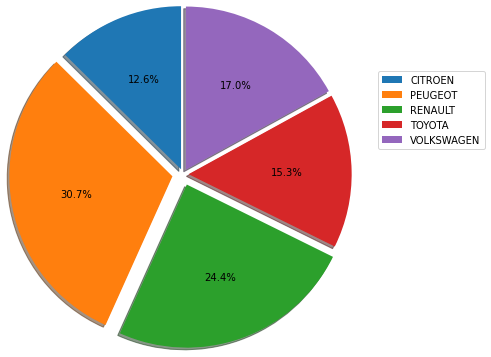

In [69]:

plt.figure(figsize = (12,5))
plt.pie(
    brand_nbr, 
    autopct = '%1.1f%%',
    shadow = True, 
    startangle = 90,
    explode = (0.05, 0.1, 0.1,0.05,0.05),
    radius = 1.5 
       )

plt.legend(brand_nbr.index, bbox_to_anchor=(1.2, 0.90));

In [70]:
energie_weight = df_final.groupby('Energie')['KM'].nunique()

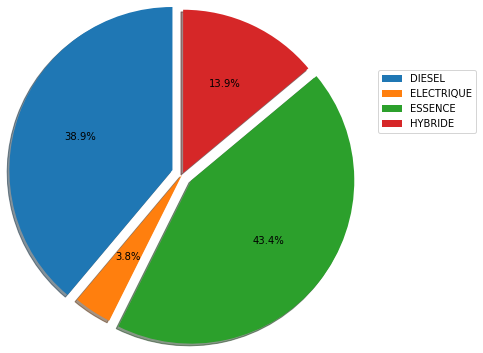

In [71]:
plt.figure(figsize = (12,5))
plt.pie(
    energie_weight, 
    autopct = '%1.1f%%',
    shadow = True, 
    startangle = 90,
    explode = (0.1, 0.01, 0.1,0.01),
    radius = 1.5 
       )

plt.legend(energie_weight.index, bbox_to_anchor=(1.2, 0.90));

In [72]:
df_final.describe(include='all')

,Brand,Model,Gear,KM,Category,Energie,Year,Price,Zip_code,longitude,latitude,City,State,Region
count,11578,11578,11578,11578.000000,11578,11578,11578.000000,11578.000000,11578.000000,11578.000000,11578.000000,11578,11578,11578
unique,5,26,2,NaN,2,4,NaN,NaN,NaN,NaN,NaN,675,12,82
top,PEUGEOT,208,MANUELLE,NaN,Second-Hand,ESSENCE,NaN,NaN,NaN,NaN,NaN,CESSON-SÉVIGNÉ,AUVERGNE-RHÔNE-ALPES,BOUCHES-DU-RHÔNE
freq,3551,1157,6914,NaN,10310,5159,NaN,NaN,NaN,NaN,NaN,335,1827,661
mean,NaN,NaN,NaN,33173.107272,NaN,NaN,2019.287614,20288.957506,53685.622560,2.457058,46.904975,NaN,NaN,NaN
std,NaN,NaN,NaN,35320.594469,NaN,NaN,1.854895,8954.503940,23625.912766,2.479169,2.231114,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,NaN,NaN,1987.000000,2040.000000,10000.000000,-4.466963,42.622028,NaN,NaN,NaN
25%,NaN,NaN,NaN,7600.000000,NaN,NaN,2018.000000,13230.000000,34200.000000,0.584480,45.036849,NaN,NaN,NaN
50%,NaN,NaN,NaN,21471.500000,NaN,NaN,2020.000000,17990.000000,57070.000000,2.386475,47.181400,NaN,NaN,NaN
75%,NaN,NaN,NaN,48364.750000,NaN,NaN,2021.000000,25950.000000,74200.000000,4.779805,48.841738,NaN,NaN,NaN


# CLIENT SELECTOR

In [73]:
data = df_final

In [74]:
Brand = 'TOYOTA'
Model = 'YARIS'
Gear = 'AUTOMATIQUE'
KrM = 50000
Energie = 'HYBRIDE'
Year = 2019
Price = 30000
State = 'AUVERGNE-RHÔNE-ALPES'

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11578 entries, 0 to 11577
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Brand      11578 non-null  object 
 1   Model      11578 non-null  object 
 2   Gear       11578 non-null  object 
 3   KM         11578 non-null  int64  
 4   Category   11578 non-null  object 
 5   Energie    11578 non-null  object 
 6   Year       11578 non-null  int64  
 7   Price      11578 non-null  float64
 8   Zip_code   11578 non-null  int64  
 9   longitude  11578 non-null  float64
 10  latitude   11578 non-null  float64
 11  City       11578 non-null  object 
 12  State      11578 non-null  object 
 13  Region     11578 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 1.2+ MB


In [76]:
maskall = (data['Brand'] == Brand) &\
            (data['Model'] == Model) &\
            (data['Gear'] == Gear) &\
            (data['KM'] <= KrM) &\
            (data['Energie'] == Energie) &\
            (data['Year'] >= Year) & \
            (data['Price'] <= Price) &\
            (data['State'] == State)

data = data.loc[maskall,:]
data

,Brand,Model,Gear,KM,Category,Energie,Year,Price,Zip_code,longitude,latitude,City,State,Region
42,TOYOTA,YARIS,AUTOMATIQUE,5071,Second-Hand,HYBRIDE,2021,18000.0,69140,4.877194,45.811371,RILLIEUX-LA-PAPE,AUVERGNE-RHÔNE-ALPES,RHÔNE
156,TOYOTA,YARIS,AUTOMATIQUE,11,New,HYBRIDE,2021,22660.0,69960,4.920700,45.668576,CORBAS,AUVERGNE-RHÔNE-ALPES,RHÔNE
158,TOYOTA,YARIS,AUTOMATIQUE,11,New,HYBRIDE,2021,21610.0,69960,4.920700,45.668576,CORBAS,AUVERGNE-RHÔNE-ALPES,RHÔNE
162,TOYOTA,YARIS,AUTOMATIQUE,12,New,HYBRIDE,2021,24760.0,69960,4.920700,45.668576,CORBAS,AUVERGNE-RHÔNE-ALPES,RHÔNE
163,TOYOTA,YARIS,AUTOMATIQUE,12,New,HYBRIDE,2021,25810.0,69960,4.920700,45.668576,CORBAS,AUVERGNE-RHÔNE-ALPES,RHÔNE
211,TOYOTA,YARIS,AUTOMATIQUE,16565,Second-Hand,HYBRIDE,2019,17980.0,69960,4.920700,45.668576,CORBAS,AUVERGNE-RHÔNE-ALPES,RHÔNE
213,TOYOTA,YARIS,AUTOMATIQUE,15067,Second-Hand,HYBRIDE,2019,15290.0,69200,4.880373,45.720460,VÉNISSIEUX,AUVERGNE-RHÔNE-ALPES,RHÔNE
248,TOYOTA,YARIS,AUTOMATIQUE,12545,Second-Hand,HYBRIDE,2021,24500.0,63000,3.135567,45.789653,CLERMONT-FERRAND,AUVERGNE-RHÔNE-ALPES,PUY-DE-DÔME
662,TOYOTA,YARIS,AUTOMATIQUE,36076,Second-Hand,HYBRIDE,2019,16090.0,69960,4.920700,45.668576,CORBAS,AUVERGNE-RHÔNE-ALPES,RHÔNE
1567,TOYOTA,YARIS,AUTOMATIQUE,33895,Second-Hand,HYBRIDE,2019,15820.0,69960,4.920700,45.668576,CORBAS,AUVERGNE-RHÔNE-ALPES,RHÔNE


In [77]:
fig = px.scatter_mapbox(data, 
                        lat="latitude", 
                        lon="longitude", 
                        color="Category", 
                        zoom=7.5, 
                        mapbox_style="carto-positron",
                        hover_name='Brand',
                        text='City',
                        #size='KM',
                        title='Cars recommendation : TEST')
fig.show()

In [78]:
df_final.shape

(11578, 14)

In [79]:
#Car per State
df_final.groupby('State')['KM'].count()

State
AUVERGNE-RHÔNE-ALPES          1827
BOURGOGNE-FRANCHE-COMTÉ        286
BRETAGNE                       575
CENTRE-VAL DE LOIRE            696
GRAND EST                     1013
HAUTS-DE-FRANCE               1083
NORMANDIE                      462
NOUVELLE-AQUITAINE            1732
OCCITANIE                      853
PAYS DE LA LOIRE               573
PROVENCE-ALPES-CÔTE D'AZUR     897
ÎLE-DE-FRANCE                 1581
Name: KM, dtype: int64

In [80]:
#Car per State (%)
df_final.groupby('State')['KM'].count()/df_final.shape[0]

State
AUVERGNE-RHÔNE-ALPES          0.157799
BOURGOGNE-FRANCHE-COMTÉ       0.024702
BRETAGNE                      0.049663
CENTRE-VAL DE LOIRE           0.060114
GRAND EST                     0.087494
HAUTS-DE-FRANCE               0.093539
NORMANDIE                     0.039903
NOUVELLE-AQUITAINE            0.149594
OCCITANIE                     0.073674
PAYS DE LA LOIRE              0.049490
PROVENCE-ALPES-CÔTE D'AZUR    0.077475
ÎLE-DE-FRANCE                 0.136552
Name: KM, dtype: float64

In [81]:
#Car per Category
df_final.groupby('Category')['KM'].count()

Category
New             1268
Second-Hand    10310
Name: KM, dtype: int64

In [82]:
#Car per Category (%)
df_final.groupby('Category')['KM'].count()/df_final.shape[0]

Category
New            0.109518
Second-Hand    0.890482
Name: KM, dtype: float64

# VISUALIZATIONS

In [83]:
fig = px.scatter_mapbox(df_final, 
                        lat="latitude", 
                        lon="longitude", 
                        color="Category", 
                        zoom=4.2, 
                        mapbox_style="carto-positron",
                        hover_name='Brand',
                        text='City',
                        #size='KM',
                        title='Cars recommendation in France per category')
fig.show()

In [84]:
fig = px.scatter_mapbox(df_final, 
                        lat="latitude", 
                        lon="longitude", 
                        color="Energie", 
                        zoom=4.2, 
                        mapbox_style="carto-positron",
                        hover_name='Brand',
                        text='City',
                        #size='KM',
                        title='Cars recommendation in France per energy')
fig.show()

In [85]:
fig = px.scatter_mapbox(df_final, 
                        lat="latitude", 
                        lon="longitude", 
                        color="Brand", 
                        zoom=4.2, 
                        mapbox_style="carto-positron",
                        hover_name='Brand',
                        text='City',
                        #size='KM',
                        title='Cars recommendation in France per brand')
fig.show()

# CLIENT SELECTION & FILTERS

In [86]:
print('The final dataset has {} rows and {} columns.'.format(df_final.shape[0],df_final.shape[1]))
print('We have cleaned {} rows ({}%) and add {} columns.'.format(-(df_final.shape[0]-df_conso.shape[0]),round(-(df_final.shape[0]-df_conso.shape[0])/df_conso.shape[0]*100,2),df_final.shape[1]-df_conso.shape[1]))

The final dataset has 11578 rows and 14 columns.
We have cleaned 7217 rows (38.4%) and add 4 columns.


In [87]:
df_final.shape

(11578, 14)

## A) SCORING

In [88]:
def scoring(df_final):
    
    scoring = 0
    
    if df_final['Gear'] == 'MANUELLE':
        scoring += 1
    elif df_final['Gear'] != 'MANUELLE':
        scoring += 2

    scoring
        
        
    if df_final['KM'] <= 100:
        scoring += 10
    elif df_final['KM'] >100 and df_final['KM'] <= 8000:# au debut la voiture decote plus vite 
        scoring += 9
    elif df_final['KM'] > 8000 and df_final['KM'] <= 22893:
        scoring += 8
    elif df_final['KM'] > 22893 and df_final['KM'] <= 51123:
        scoring += 7
    elif df_final['KM'] > 51123 and df_final['KM'] <= 80000: # a plus de 80milles il y a les courois a changer entretient plus gros plus cher 
        scoring += 6 
    elif df_final['KM'] > 80000 and df_final['KM'] <= 110000: 
        scoring += 5  
    elif df_final['KM'] > 110000 and df_final['KM'] <= 130000: 
        scoring += 4
    elif df_final['KM'] > 130000 and df_final['KM'] <= 150000: 
        scoring += 3
    elif df_final['KM'] > 150000 and df_final['KM'] <= 200000: 
        scoring += 2
    elif df_final['KM'] > 200000 : 
        scoring += 1
   
    if df_final['Energie'] == 'ESSENCE' :
        scoring +=3
    elif df_final['Energie'] =='DIESEL':# 2024 plus de diesel a paris 
        scoring += 2
    elif df_final['Energie'] =='HYBRIDE':# norrme wltp = rejete un co2 inferieur a 90gr et 0gr pour l'electrique
        scoring += 4
    elif df_final['Energie'] == 'ELECTRIQUE':
        scoring += 5
    
    if df_final['Year'] < 2000 :
        scoring += 0
    elif df_final['Year'] >= 2000 and df_final['Year'] <= 2013 :
        scoring += 1
    elif df_final['Year'] >= 2014 and df_final['Year'] <= 2018 :
        scoring += 2
    elif df_final['Year'] > 2018 and df_final['Year'] <= 2019 : # 2019 a 2020
        scoring += 3
    elif df_final['Year'] > 2019 and df_final['Year'] <= 2020 :
        scoring += 4
    elif df_final['Year'] > 2020 :
        scoring += 5
        
    scoring = round((scoring/22)*10,2)
        
    return scoring

df_final['Scoring'] = df_final.apply(scoring, axis=1)
df_final.sample(5)

,Brand,Model,Gear,KM,Category,Energie,Year,Price,Zip_code,longitude,latitude,City,State,Region,Scoring
4219,RENAULT,MEGANE,MANUELLE,6851,Second-Hand,DIESEL,2021,22180.0,76000,1.066394,49.448129,ROUEN,NORMANDIE,SEINE-MARITIME,7.73
1936,PEUGEOT,108,MANUELLE,11,New,ESSENCE,2021,14480.0,33700,-0.688450,44.822822,MÉRIGNAC,NOUVELLE-AQUITAINE,GIRONDE,8.64
3476,VOLKSWAGEN,GOLF,AUTOMATIQUE,18096,Second-Hand,DIESEL,2021,38100.0,64230,-0.439551,43.324777,"AUBIN, AUSSEVIELLE, SIROS, UZEIN, BOUGARBER, M...",NOUVELLE-AQUITAINE,PYRÉNÉES-ATLANTIQUES,7.73
7329,PEUGEOT,2008,AUTOMATIQUE,3000,Second-Hand,ELECTRIQUE,2021,32890.0,63000,3.086300,45.779700,CLERMONT-FERRAND,AUVERGNE-RHÔNE-ALPES,PUY-DE-DÔME,9.55
7790,PEUGEOT,208,MANUELLE,14010,Second-Hand,ESSENCE,2019,12980.0,69200,4.871500,45.702500,VÉNISSIEUX,AUVERGNE-RHÔNE-ALPES,RHÔNE,6.82


In [89]:
#Creating csv from 2 scraping after cleaning
df_final.to_csv('LaCentrale+autosphere+GPS+Scoring.csv')

In [90]:
#Create a specific dataset to perform the client's recommendation
df_rec = df_final

## B) FILTER PER REGION

In [91]:
fig = px.scatter_mapbox(df_rec, 
                        lat="latitude", 
                        lon="longitude", 
                        color="State", 
                        zoom=4.2, 
                        mapbox_style="carto-positron",
                        hover_name='Brand',
                        text='City',
                        #size='KM',
                        title='Cars recommendation: Region')
fig.show()

In [92]:
list_state = df_rec['State'].unique()
list_state = list(list_state)
list_state

['NOUVELLE-AQUITAINE',
 'HAUTS-DE-FRANCE',
 'ÎLE-DE-FRANCE',
 "PROVENCE-ALPES-CÔTE D'AZUR",
 'AUVERGNE-RHÔNE-ALPES',
 'NORMANDIE',
 'GRAND EST',
 'OCCITANIE',
 'BOURGOGNE-FRANCHE-COMTÉ',
 'BRETAGNE',
 'CENTRE-VAL DE LOIRE',
 'PAYS DE LA LOIRE']

In [93]:
q0 = input('Quelle votre région?')
mask_state = df_rec['State'] == q0
df_rec = df_rec.loc[mask_state,:]
df_rec.shape


Quelle votre région? ÎLE-DE-FRANCE


(1581, 15)

In [94]:
fig = px.scatter_mapbox(df_rec, 
                        lat="latitude", 
                        lon="longitude", 
                        color="Category", 
                        zoom=5.0, 
                        mapbox_style="carto-positron",
                        hover_name='Brand',
                        text='City',
                        #size='KM',
                        title='Cars recommendation : Region & category')
fig.show()

In [95]:
fig = px.scatter_mapbox(df_rec, 
                        lat="latitude", 
                        lon="longitude", 
                        color="Brand", 
                        zoom=5.0, 
                        mapbox_style="carto-positron",
                        hover_name='Brand',
                        text='City',
                        #size='KM',
                        title='Cars recommendation : Model')
fig.show()

In [96]:
list_brand = df_rec['Brand'].unique()
list_brand = list(list_brand)
list_brand

['RENAULT', 'PEUGEOT', 'CITROEN', 'TOYOTA', 'VOLKSWAGEN']

In [97]:
q1 = input('Quelle marque de voiture désirez-vous?')
mask_brand = df_rec['Brand'] == q1
df_rec = df_rec.loc[mask_brand,:]
df_rec.shape

Quelle marque de voiture désirez-vous? PEUGEOT


(312, 15)

In [98]:
fig = px.scatter_mapbox(df_rec, 
                        lat="latitude", 
                        lon="longitude", 
                        color="Model", 
                        zoom=5.0, 
                        mapbox_style="carto-positron",
                        hover_name='Brand',
                        text='City',
                        #size='KM',
                        title='Cars recommendation: Model selection')
fig.show()

In [99]:
list_model = df_rec['Model'].unique()
list_model = list(list_model)
list_model

['3008', '308', '2008', '108', '208']

In [100]:
q2 = input('Quel modèle de cette marque voiture désirez-vous?')
mask_model = df_rec['Model'] == q2
df_rec = df_rec.loc[mask_model,:]
df_rec.shape

Quel modèle de cette marque voiture désirez-vous? 208


(92, 15)

In [101]:
fig = px.scatter_mapbox(df_rec, 
                        lat="latitude", 
                        lon="longitude", 
                        color="Gear", 
                        zoom=5.0, 
                        mapbox_style="carto-positron",
                        hover_name='Brand',
                        text='City',
                        #size='KM',
                        title='Cars recommendation: Gear')
fig.show()

In [102]:
list_gear = df_rec['Gear'].unique()
list_gear = list(list_gear)
list_gear

['MANUELLE', 'AUTOMATIQUE']

In [103]:
q3 = input('Quel type de boîte de vitesse désirez-vous?')
mask_gear = df_rec['Gear'] == q3
df_rec = df_rec.loc[mask_gear,:]
df_rec.shape

Quel type de boîte de vitesse désirez-vous? MANUELLE


(72, 15)

In [104]:
fig = px.scatter_mapbox(df_rec, 
                        lat="latitude", 
                        lon="longitude", 
                        color="Scoring", 
                        zoom=5.0, 
                        mapbox_style="carto-positron",
                        hover_name='Brand',
                        text='City',
                        #size='Scoring',
                        title='Cars recommendation: Scoring')
fig.show()

In [105]:
#Set a TOP 10 scoring
top10 = df_rec.sort_values(by=['Scoring'], ascending=False).head(10)
top10

,Brand,Model,Gear,KM,Category,Energie,Year,Price,Zip_code,longitude,latitude,City,State,Region,Scoring
1113,PEUGEOT,208,MANUELLE,12,New,ESSENCE,2021,22980.0,94120,2.456175,48.850186,FONTENAY-SOUS-BOIS,ÎLE-DE-FRANCE,VAL-DE-MARNE,8.64
6900,PEUGEOT,208,MANUELLE,11,New,ESSENCE,2021,24060.0,92250,2.238421,48.903225,LA GARENNE-COLOMBES,ÎLE-DE-FRANCE,HAUTS-DE-SEINE,8.64
2366,PEUGEOT,208,MANUELLE,11,New,ESSENCE,2021,21710.0,94100,2.483583,48.798321,SAINT-MAUR-DES-FOSSÉS,ÎLE-DE-FRANCE,VAL-DE-MARNE,8.64
2126,PEUGEOT,208,MANUELLE,12,New,DIESEL,2021,24990.0,94120,2.456175,48.850186,FONTENAY-SOUS-BOIS,ÎLE-DE-FRANCE,VAL-DE-MARNE,8.18
323,PEUGEOT,208,MANUELLE,12,New,DIESEL,2021,24790.0,94120,2.456175,48.850186,FONTENAY-SOUS-BOIS,ÎLE-DE-FRANCE,VAL-DE-MARNE,8.18
6512,PEUGEOT,208,MANUELLE,12,New,DIESEL,2021,26770.0,92250,2.238421,48.903225,LA GARENNE-COLOMBES,ÎLE-DE-FRANCE,HAUTS-DE-SEINE,8.18
459,PEUGEOT,208,MANUELLE,5350,Second-Hand,ESSENCE,2021,20220.0,93600,2.521687,48.950336,AULNAY-SOUS-BOIS,ÎLE-DE-FRANCE,SEINE-SAINT-DENIS,8.18
4171,PEUGEOT,208,MANUELLE,1665,Second-Hand,ESSENCE,2021,23970.0,92250,2.238421,48.903225,LA GARENNE-COLOMBES,ÎLE-DE-FRANCE,HAUTS-DE-SEINE,8.18
1390,PEUGEOT,208,MANUELLE,5400,Second-Hand,ESSENCE,2021,20410.0,93600,2.521687,48.950336,AULNAY-SOUS-BOIS,ÎLE-DE-FRANCE,SEINE-SAINT-DENIS,8.18
1492,PEUGEOT,208,MANUELLE,4659,Second-Hand,ESSENCE,2021,21510.0,75015,2.293987,48.830741,"PARIS 15, PARIS",ÎLE-DE-FRANCE,PARIS,8.18


In [106]:
#Set a TOP 5 scoring
top5 = df_rec.sort_values(by=['Scoring'], ascending=False).head(5)
top5

,Brand,Model,Gear,KM,Category,Energie,Year,Price,Zip_code,longitude,latitude,City,State,Region,Scoring
1113,PEUGEOT,208,MANUELLE,12,New,ESSENCE,2021,22980.0,94120,2.456175,48.850186,FONTENAY-SOUS-BOIS,ÎLE-DE-FRANCE,VAL-DE-MARNE,8.64
6900,PEUGEOT,208,MANUELLE,11,New,ESSENCE,2021,24060.0,92250,2.238421,48.903225,LA GARENNE-COLOMBES,ÎLE-DE-FRANCE,HAUTS-DE-SEINE,8.64
2366,PEUGEOT,208,MANUELLE,11,New,ESSENCE,2021,21710.0,94100,2.483583,48.798321,SAINT-MAUR-DES-FOSSÉS,ÎLE-DE-FRANCE,VAL-DE-MARNE,8.64
2126,PEUGEOT,208,MANUELLE,12,New,DIESEL,2021,24990.0,94120,2.456175,48.850186,FONTENAY-SOUS-BOIS,ÎLE-DE-FRANCE,VAL-DE-MARNE,8.18
323,PEUGEOT,208,MANUELLE,12,New,DIESEL,2021,24790.0,94120,2.456175,48.850186,FONTENAY-SOUS-BOIS,ÎLE-DE-FRANCE,VAL-DE-MARNE,8.18


In [107]:
km_avg = df_rec['KM'].mean()
print('The average distance done is {} Km.'.format(round(km_avg,2)))
print('--------------------------------')
km_std = df_rec['KM'].std()/2
print('The std distance is {} Km'.format(round(km_std,2)))
print('--------------------------------')
km_max = df_rec['KM'].max()
print('The maximum distance done available is {} Km.'.format(round(km_max,2)))
print('--------------------------------')
km_min = df_rec['KM'].min()
print('The minimum distance done available is {} Km.'.format(round(km_min,2)))
print('--------------------------------')
print(' ')
print('KM RECOMMENDATION')
max_interval_km = km_avg+km_std
min_interval_km = km_avg-km_std
print('The market shows that a KM in a range of {} Km and {} Km is acceptable'.format(round(min_interval_km,2),round(max_interval_km,2)))

The average distance done is 36920.07 Km.
--------------------------------
The std distance is 14553.13 Km
--------------------------------
The maximum distance done available is 123355 Km.
--------------------------------
The minimum distance done available is 11 Km.
--------------------------------
 
KM RECOMMENDATION
The market shows that a KM in a range of 22366.94 Km and 51473.19 Km is acceptable


In [108]:
q4 = input('Nombre maximum de kilomètre(s) souhaité(s)?')
q4 = int(q4)
mask_KM = df_rec['KM'] <= q4
df_rec = df_rec.loc[mask_KM,:]

df_rec.shape

Nombre maximum de kilomètre(s) souhaité(s)? 40000


(46, 15)

In [109]:
fig = px.scatter_mapbox(df_rec, 
                        lat="latitude", 
                        lon="longitude", 
                        color="Energie", 
                        zoom=5.0, 
                        mapbox_style="carto-positron",
                        hover_name='Brand',
                        text='City',
                        #size='Scoring',
                        title='Cars recommendation: Energy')
fig.show()

In [110]:
list_energie = df_rec['Energie'].unique()
list_energie = list(list_energie)
list_energie

['ESSENCE', 'DIESEL']

In [111]:
q5 = input('Quel type d\'énergie souhaitez-vous?')
mask_energie = df_rec['Energie'] == q5
df_rec = df_rec.loc[mask_energie,:]
df_rec.shape

Quel type d'énergie souhaitez-vous? ESSENCE


(38, 15)

In [112]:
fig = px.scatter_mapbox(df_rec, 
                        lat="latitude", 
                        lon="longitude", 
                        color="Year", 
                        zoom=5.0, 
                        mapbox_style="carto-positron",
                        hover_name='Brand',
                        text='City',
                        #size='KM',
                        title='Cars recommendation: Brand selection')
fig.show()

In [113]:
list_year = df_rec['Year'].unique()
list_year = list(list_year)
list_year

[2019, 2021, 2020, 2015]

In [114]:
q6 = input('Quelle ancienneté maximum?')
q6 = int(q6)
mask_year = df_rec['Year'] >= q6
df_rec = df_rec.loc[mask_year,:]
df_rec.shape

Quelle ancienneté maximum? 2019


(37, 15)

In [115]:
top5

,Brand,Model,Gear,KM,Category,Energie,Year,Price,Zip_code,longitude,latitude,City,State,Region,Scoring
1113,PEUGEOT,208,MANUELLE,12,New,ESSENCE,2021,22980.0,94120,2.456175,48.850186,FONTENAY-SOUS-BOIS,ÎLE-DE-FRANCE,VAL-DE-MARNE,8.64
6900,PEUGEOT,208,MANUELLE,11,New,ESSENCE,2021,24060.0,92250,2.238421,48.903225,LA GARENNE-COLOMBES,ÎLE-DE-FRANCE,HAUTS-DE-SEINE,8.64
2366,PEUGEOT,208,MANUELLE,11,New,ESSENCE,2021,21710.0,94100,2.483583,48.798321,SAINT-MAUR-DES-FOSSÉS,ÎLE-DE-FRANCE,VAL-DE-MARNE,8.64
2126,PEUGEOT,208,MANUELLE,12,New,DIESEL,2021,24990.0,94120,2.456175,48.850186,FONTENAY-SOUS-BOIS,ÎLE-DE-FRANCE,VAL-DE-MARNE,8.18
323,PEUGEOT,208,MANUELLE,12,New,DIESEL,2021,24790.0,94120,2.456175,48.850186,FONTENAY-SOUS-BOIS,ÎLE-DE-FRANCE,VAL-DE-MARNE,8.18


In [116]:
print('--------------------------------')
price_avg = df_rec['Price'].mean()
print('The average price is {}€'.format(round(price_avg,2)))
print('--------------------------------')
price_std = df_rec['Price'].std()
print('The std price is {}€'.format(round(price_std,2)))


print('--------------------------------')

price_max = df_rec['Price'].max()
print('The maximum price is {}€'.format(round(price_max,2)))
print('--------------------------------')
price_min = df_rec['Price'].min()
print('The minimum price is {}€'.format(round(price_min,2)))
print('--------------------------------')
print(' ')
print('PRICE RECOMMENDATION')
max_interval = price_avg+price_std
min_interval = price_avg-price_std
print('We recommend you to select a car into a range between {}€ and {}€'.format(round(min_interval,2),round(max_interval,2)))

--------------------------------
The average price is 15290.54€
--------------------------------
The std price is 3768.27€
--------------------------------
The maximum price is 24060.0€
--------------------------------
The minimum price is 11490.0€
--------------------------------
 
PRICE RECOMMENDATION
We recommend you to select a car into a range between 11522.28€ and 19058.81€


In [117]:
# Label the recommendation
df_rec['Price_recommendation'] = df_rec['Price'].apply(lambda x: 'Expensive' if x > max_interval 
                                                else 'In market' if max_interval >= x >= min_interval 
                                                else 'Good price' if x < min_interval

                                                else x
                                                )

In [118]:
fig = px.scatter_mapbox(df_rec, 
                        lat="latitude", 
                        lon="longitude", 
                        color="Price_recommendation", 
                        zoom=5.0, 
                        mapbox_style="carto-positron",
                        hover_name='Brand',
                        text='City',
                        #size='Price_recommendation',
                        title='Cars recommendation: Brand selection')
fig.show()

In [119]:
q7 = input('Quel prix maximum souhaitez-vous investir?')
q7 = float(q7)
mask_price = df_rec['Price'] <= q7
df_rec = df_rec.loc[mask_price,:]
df_rec.shape

Quel prix maximum souhaitez-vous investir? 25000


(37, 16)

# C) FINAL RECOMMENDATION

In [120]:
#The output after the client has selected all his requirements
df_rec.sample(10)

,Brand,Model,Gear,KM,Category,Energie,Year,Price,Zip_code,longitude,latitude,City,State,Region,Scoring,Price_recommendation
6900,PEUGEOT,208,MANUELLE,11,New,ESSENCE,2021,24060.0,92250,2.238421,48.903225,LA GARENNE-COLOMBES,ÎLE-DE-FRANCE,HAUTS-DE-SEINE,8.64,Expensive
1113,PEUGEOT,208,MANUELLE,12,New,ESSENCE,2021,22980.0,94120,2.456175,48.850186,FONTENAY-SOUS-BOIS,ÎLE-DE-FRANCE,VAL-DE-MARNE,8.64,Expensive
3757,PEUGEOT,208,MANUELLE,19700,Second-Hand,ESSENCE,2020,14120.0,78000,2.153866,48.812168,VERSAILLES,ÎLE-DE-FRANCE,YVELINES,7.27,In market
797,PEUGEOT,208,MANUELLE,35387,Second-Hand,ESSENCE,2019,11790.0,78190,2.012375,48.771468,TRAPPES,ÎLE-DE-FRANCE,YVELINES,6.36,In market
1603,PEUGEOT,208,MANUELLE,28874,Second-Hand,ESSENCE,2019,13730.0,78310,1.933024,48.756704,"MAUREPAS, COIGNIÈRES",ÎLE-DE-FRANCE,YVELINES,6.36,In market
1877,PEUGEOT,208,MANUELLE,31694,Second-Hand,ESSENCE,2019,14370.0,78310,1.933024,48.756704,"MAUREPAS, COIGNIÈRES",ÎLE-DE-FRANCE,YVELINES,6.36,In market
1818,PEUGEOT,208,MANUELLE,17675,Second-Hand,ESSENCE,2019,13300.0,78000,2.153866,48.812168,VERSAILLES,ÎLE-DE-FRANCE,YVELINES,6.82,In market
1492,PEUGEOT,208,MANUELLE,4659,Second-Hand,ESSENCE,2021,21510.0,75015,2.293987,48.830741,"PARIS 15, PARIS",ÎLE-DE-FRANCE,PARIS,8.18,Expensive
2677,PEUGEOT,208,MANUELLE,30522,Second-Hand,ESSENCE,2020,13300.0,78140,2.182352,48.781029,VÉLIZY-VILLACOUBLAY,ÎLE-DE-FRANCE,YVELINES,6.82,In market
1390,PEUGEOT,208,MANUELLE,5400,Second-Hand,ESSENCE,2021,20410.0,93600,2.521687,48.950336,AULNAY-SOUS-BOIS,ÎLE-DE-FRANCE,SEINE-SAINT-DENIS,8.18,Expensive


In [121]:
fig = px.scatter_mapbox(df_rec, 
                        lat="latitude", 
                        lon="longitude", 
                        color="Price_recommendation", 
                        zoom=5.0, 
                        mapbox_style="carto-positron",
                        hover_name='Brand',
                        text='City',
                        #size='Price_recommendation',
                        title='Cars recommendation: Brand selection')
fig.show()

In [122]:
df_final.head()

,Brand,Model,Gear,KM,Category,Energie,Year,Price,Zip_code,longitude,latitude,City,State,Region,Scoring
0,RENAULT,CLIO,MANUELLE,7577,Second-Hand,DIESEL,2020,17830.0,33310,-0.510499,44.878583,LORMONT,NOUVELLE-AQUITAINE,GIRONDE,7.27
1,RENAULT,CLIO,MANUELLE,49851,Second-Hand,DIESEL,2019,11540.0,24400,0.369879,45.044040,"SAINT-MÉDARD-DE-MUSSIDAN, ÉGLISE-NEUVE-D’ISSAC...",NOUVELLE-AQUITAINE,DORDOGNE,5.91
2,RENAULT,CLIO,MANUELLE,19318,Second-Hand,ESSENCE,2020,13360.0,24400,0.369879,45.044040,"SAINT-MÉDARD-DE-MUSSIDAN, ÉGLISE-NEUVE-D’ISSAC...",NOUVELLE-AQUITAINE,DORDOGNE,7.27
3,RENAULT,MEGANE,MANUELLE,124202,Second-Hand,DIESEL,2018,11530.0,59650,3.121595,50.631513,VILLENEUVE-D'ASCQ,HAUTS-DE-FRANCE,NORD,4.09
4,RENAULT,MEGANE,MANUELLE,66729,Second-Hand,DIESEL,2019,19360.0,59260,3.122092,50.626434,"LEZENNES, LILLE",HAUTS-DE-FRANCE,NORD,5.45


In [123]:
df_webapp = df_final.drop(columns=['City','Region','Zip_code','longitude','latitude'],axis=1)
df_webapp

,Brand,Model,Gear,KM,Category,Energie,Year,Price,State,Scoring
0,RENAULT,CLIO,MANUELLE,7577,Second-Hand,DIESEL,2020,17830.0,NOUVELLE-AQUITAINE,7.27
1,RENAULT,CLIO,MANUELLE,49851,Second-Hand,DIESEL,2019,11540.0,NOUVELLE-AQUITAINE,5.91
2,RENAULT,CLIO,MANUELLE,19318,Second-Hand,ESSENCE,2020,13360.0,NOUVELLE-AQUITAINE,7.27
3,RENAULT,MEGANE,MANUELLE,124202,Second-Hand,DIESEL,2018,11530.0,HAUTS-DE-FRANCE,4.09
4,RENAULT,MEGANE,MANUELLE,66729,Second-Hand,DIESEL,2019,19360.0,HAUTS-DE-FRANCE,5.45
...,...,...,...,...,...,...,...,...,...,...
11573,VOLKSWAGEN,T-ROC,AUTOMATIQUE,69650,Second-Hand,DIESEL,2019,27990.0,HAUTS-DE-FRANCE,5.91
11574,VOLKSWAGEN,POLO,AUTOMATIQUE,29736,Second-Hand,DIESEL,2017,15987.0,GRAND EST,5.91
11575,VOLKSWAGEN,T-ROC,AUTOMATIQUE,55890,Second-Hand,ESSENCE,2018,25900.0,PROVENCE-ALPES-CÔTE D'AZUR,5.91
11576,VOLKSWAGEN,TIGUAN,MANUELLE,61873,Second-Hand,DIESEL,2018,21990.0,GRAND EST,5.00


In [124]:
df_webapp.to_csv('df_webapp.csv')